In [2]:
import torch

from utils.gan import ConditionalDCGAN
from utils.datasets import load_mnist_notmnist
from utils.ood_sampling import generate_ood_hypersphere

import pylab as plt
import torchvision

In [3]:
train_ds, _, _, _, _ = load_mnist_notmnist()
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=256, shuffle=True)

Using downloaded and verified file: /home/denis/.datasets/notMNIST/notMNIST_small.tar.gz


In [4]:
gan = ConditionalDCGAN(n_latent=2, n_channel=1, n_classes=10)
gan.fit(train_loader, n_epochs=1)

Training on cpu.


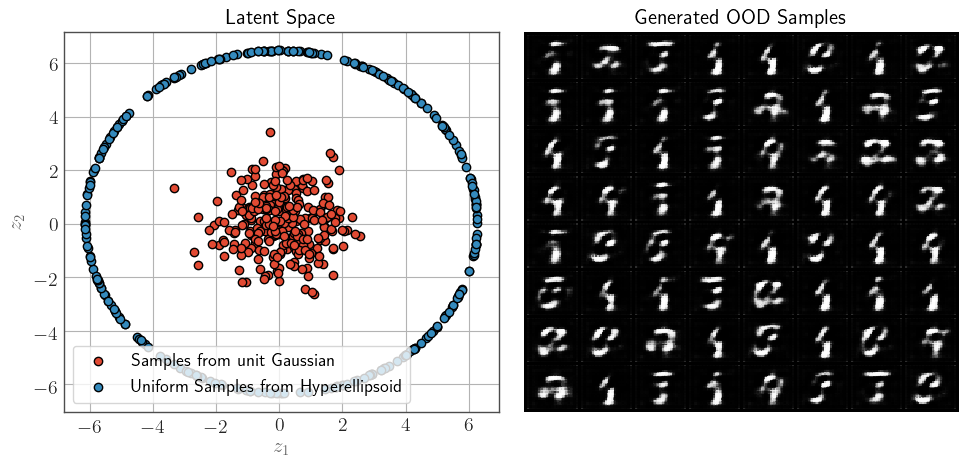

In [5]:
gan.eval().cpu()
fontsize = 15

n_samples = 300
z = torch.randn(n_samples, 2)
z_ood = generate_ood_hypersphere(z, factor=3)
z_ood = z_ood[:, :, None, None]
lbls = torch.arange(n_samples) % 10

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title('Latent Space', fontsize=fontsize)
plt.scatter(z[:, 0], z[:, 1], label='Samples from unit Gaussian')
plt.scatter(z_ood[:, 0], z_ood[:, 1],  label='Uniform Samples from Hyperellipsoid')
plt.xlabel('$z_1$', fontsize=fontsize)
plt.ylabel('$z_2$', fontsize=fontsize)
plt.legend(fontsize=fontsize//1.14)

plt.subplot(122)
plt.title('Generated OOD Samples', fontsize=fontsize)
X_ood = gan.generator(z_ood, lbls).detach()
plt.axis('off')
plt.imshow(torchvision.utils.make_grid(X_ood[:64]).permute(1, 2, 0), aspect='auto')
plt.tight_layout()
plt.show()